In [1]:
import os
import re
import json
import tempfile
import folium
import ipysheet
import numpy as np
import pandas as pd
import rasterio as rio
import rioxarray as rxr
import geopandas as gpd
import branca.colormap as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ipywidgets as widgets

from glob import glob
from pathlib import Path
from folium import plugins
from pyproj import Transformer
from ipyfilechooser import FileChooser
from ipysheet import from_dataframe
from rasterio.warp import calculate_default_transform, reproject, Resampling
from localtileserver import TileClient, get_leaflet_tile_layer, examples
from ipyleaflet import Map, Marker, basemaps, ScaleControl, LayersControl, AwesomeIcon
from ipyleaflet import LegendControl, FullScreenControl, MarkerCluster

os.environ['LOCALTILESERVER_CLIENT_PREFIX'] = \
    f"{os.environ['JUPYTERHUB_SERVICE_PREFIX'].lstrip('/')}/proxy/{{port}}"

from localtileserver import TileClient, get_leaflet_tile_layer
from localtileserver import examples, helpers
from ipyleaflet import Map, SplitMapControl
import rasterio as rio

In [2]:
# Example DEM dataset
client1 = TileClient("/explore/nobackup/projects/ilab/projects/AIML_CHM/DEM_CHM/labels/WV02_20120924_P1BS_103001001C087E00_103001001CB20900-DEM_1m-clipped.tif")
client2 = TileClient("/explore/nobackup/people/jacaraba/development/tensorflow-caney/tensorflow_caney/model/pipelines/senegal-lcluc-tests/WV02_20120924_P1BS_103001001C087E00_103001001CB20900-toa-stacked-clipped.cnn-dem-v1.tif")

#print(client1.statistics)

tdem = client1.rasterio.read()[0, :, :]
pdem = client2.rasterio.read()[0, :, :]

# Compute hillshade
hs_arr1 = helpers.hillshade(tdem)
hs_arr2 = helpers.hillshade(pdem)

# Save hillshade arrays as new raster and open with rasterio
hs1 = rio.open(helpers.save_new_raster(client1, hs_arr1))
hs2 = rio.open(helpers.save_new_raster(client2, hs_arr2))

# Make an ipyleaflet tile layer of the hillshade

tdem = get_leaflet_tile_layer(hs1)
pdem = get_leaflet_tile_layer(hs2)

m = Map(center=client1.center(), zoom=client1.default_zoom)
control = SplitMapControl(left_layer=tdem, right_layer=pdem)
m.add_control(control)
m

Map(center=[64.81939357446377, -147.5053862970499], controls=(ZoomControl(options=['position', 'zoom_in_text',…

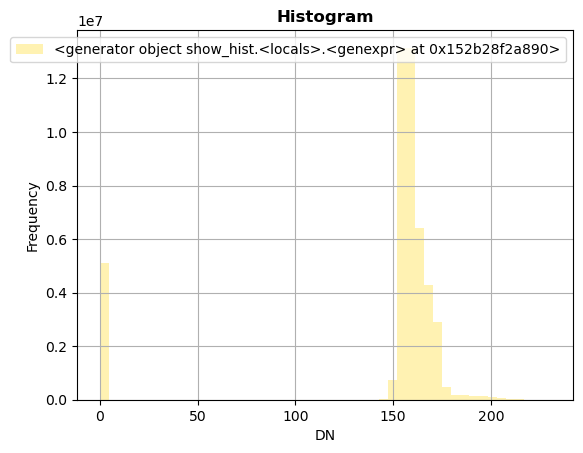

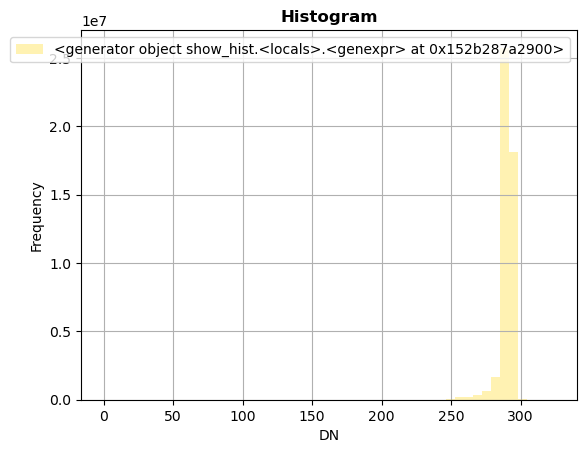

In [3]:
from rasterio.plot import show_hist
tdem = client1.rasterio.read()[0, :, :]
pdem = client2.rasterio.read()[0, :, :]

tdem[tdem < 0] = 0
pdem[pdem < 0] = 0

show_hist(
    tdem, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")
show_hist(
    pdem, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")